# Programming Assignment 2

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown). Please complete/extend this notebook for your homework submission:

* For any mathematical questions, make sure to **show you work**.
* For any questions that ask for code, please **also provide a short description of what your solution is doing and how it works**, either by adding comments or in an extra markdown cell.

Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use [Anaconda](https://www.anaconda.com/products/individual), specifically the version based on Python 3.

<div class="alert alert-warning">
Homework assignments in CS70 count towards your final grade and must therefore be done individually.
</div>

## Import statements
We provide the import statements required to complete the assignment in the following cell. 

<div class="alert alert-danger" role="alert">
    <b>Import policy:</b> You must not use any <code>import</code>'s other than the ones we provide.
</div>

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules. It imports several libraries such as NumPy and Matplotlib and configures them to produce nice graphics.
</div>

$$
\newcommand{\bp}{\mathbf{p}}
\newcommand{\bq}{\mathbf{q}}
\newcommand{\bh}{\mathbf{h}}
\newcommand{\bt}{\mathbf{t}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\vp}{\vec{p}}
\newcommand{\vq}{\vec{q}}
$$

Run the code below to make sure you can use open-cv on your device. open-cv is useful when working with images.

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # for building and manipulating matrices
import cv2 # for matrix transformations
from ipywidgets import interact
from IPython.display import display, Math, Markdown
from PA2lib import *

# for graphics:
from matplotlib import pyplot as plt
plt.rc('axes', axisbelow=True)

%matplotlib inline
# nice retina graphics on high-resolution screens
%config InlineBackend.figure_format='retina' 

### Problem 1

#### Problem 1.1

Write down the matrix $M$ that produces the depicted 2D transformation. The dashed grid lines are at 1 unit intervals.

![](images/problem1.png)

In [3]:
# TODO: put your answer here as a NumpPy array
# e.g. to create a 2 x 2 matrix with rows (a b) and (c d), you would write
# np.array([[a, b],
#           [c, d]])

M = np.array([[0, 3], [2, 1]])


You can visually validate your answer with the code snippet below.

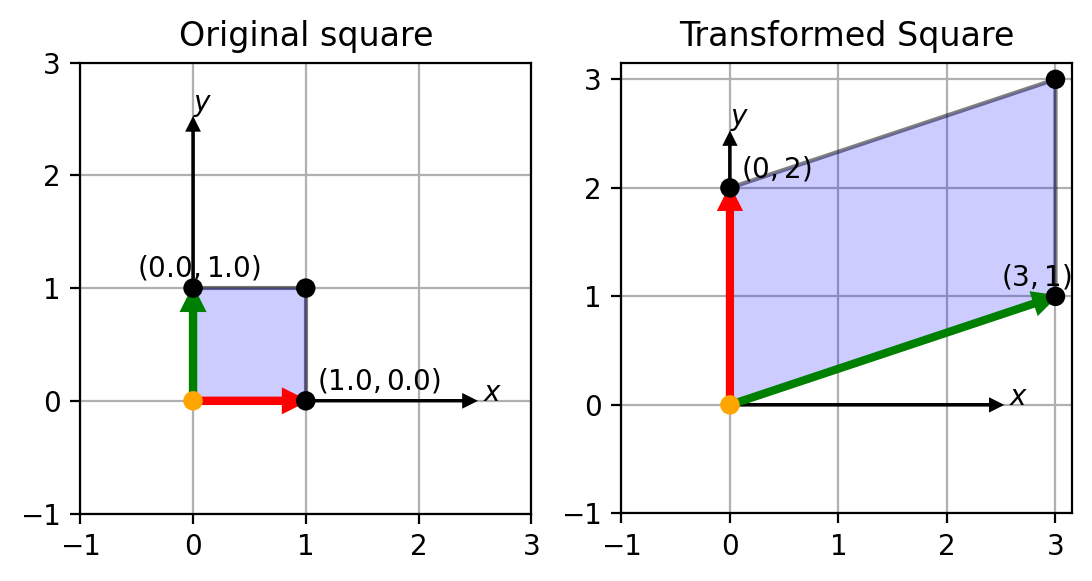

In [4]:
plt.subplot(1,2,1)
draw_xformed_square()
plt.title("Original square")
plt.subplot(1,2,2)
draw_xformed_square(M)
plt.title("Transformed Square")
plt.show()

The code snippet below lets you interactively explore the effect of the four components of a $2\times2$ transformation matrix.

In [5]:
@interact(a=1.0, b=0.0, c=0.0, d=1.0)
def interactive_xform(a,b,c,d):
    T = np.array([[a,b],[c,d]])
    draw_xformed_square(T)
    plt.show()
    print(f'T =\n{T}')    
#     display(Markdown(
#         rf"""$$
#                 T = 
#                 \begin{{pmatrix}}
#                 \color{{red}}{{{a}}} & \color{{green}}{{{b}}}\\
#                 \color{{red}}{{{c}}} & \color{{green}}{{{d}}}
#                 \end{{pmatrix}}
#             $$"""))

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-1.0), FloatSlider(value=0.0, descr…

### Problem 2

We pack the three corners of a triangle with coordinates $(5, 2)$, $(3, 0)$, and $(−2, 4)$ into
the columns of a $2 \times 3$ matrix:

$$
M_{0} = \begin{pmatrix}
5 & 3 & −2\\
2 & 0 & 4\\
\end{pmatrix}
$$

To create such a matrix in Python, you'd write:

In [6]:
M0 = np.array([[5, 3, -2],
               [2, 0,  4]])
print(f'M0 =\n{M0}')

M0 =
[[ 5  3 -2]
 [ 2  0  4]]


<div class="alert alert-info" role="alert">
    <b>TODO:</b> Construct the transformation matrix that will produce each of the following transformations and apply the transformation to produce the new triangle coordinates. Print out both your transformation matrix, and the transformed triangle coordinates.
</div>

#### Problem 2.1
Triangle $M_{1}$ is triangle $M_0$ after a 90-degree counterclockwise rotation. Remember, if you have two numpy arrays, you can perform matrix-matrix (or matrix-vector) multiplication using the `@` operator.

*Hint: You may round your result to 5 significant digits for printing using e.g. `M1.round(5)`.*

In [7]:
# TODO: put your transformation matrix answer here
rotate_mat = np.array([[0, -1],
              [1, 0]])

# TODO: put your transformed matrix answer here
M1 = (rotate_mat @ M0).round(5)

print(f'M1 =\n{M1}')


M1 =
[[-2  0 -4]
 [ 5  3 -2]]


#### Problem 2.2

Triangle $M_2$ is triangle $M_0$ with an isotropic scaling, enlarged by a factor of 2.

In [8]:
# TODO: put your transformation matrix answer here
scale_mat = np.array([[2, 0],
              [0, 2]])

# TODO: put your transformed matrix answer here
M2 = (scale_mat @ M0).round(5)

print(f'M2 =\n{M2}')

M2 =
[[10  6 -4]
 [ 4  0  8]]


#### Problem 2.3

Triangle $M_3$ is triangle $M_0$, translated 5 units down and 3 units to the right (you will need to convert triangle $M_0$ to homogeneous coordinates; check the functions `np.vstack` and `np.ones`).

In [9]:
# TODO: put your transformation matrix answer here
translate_mat = T = np.array([[1, 0, 3],
              [0, 1, -5],
              [0, 0, 1]])

# TODO: put your transformed matrix answer here
M0_homogeneous = np.vstack((M0, np.ones(3)))
M3 = (translate_mat @ M0_homogeneous)[:2,:]

print(f'M3 =\n{M3}')

M3 =
[[ 8.  6.  1.]
 [-3. -5. -1.]]


### Problem 3

Let’s apply some of these geometric transformations in Python. Using the image "einstein.png," the code below will randomly generate a $2 \times 2$ linear transformation matrix and $2 \times 1$ translation vector, warping and translating the image accordingly. Your goal is to estimate the inverse geometric transformation and then transform the modified image back to the original. To do this, you will select three distinct targets in the original image and the transformed image. With three coordinates in the warped image and the corresponding coordinates in the original, you have sufficient information to specify a fully-constrained linear system, and solve for six unknowns: The four values of the linear matrix and the two values of the translation vector.

We will be taking advantage of the interactive features provided by our `%matplotlib notebook` call above.

In [10]:
# switch to `notebook` backend to allow for graph interaction
# repeated command necessary on some machines due to issues in MPL backend switching
%matplotlib notebook
%matplotlib notebook

#### Problem 3.1 

Run the basecode below and select the three distinct targets in the original image. Your selected points will be stored as columns in a `pointsBefore` matrix (see below).

<div class="alert alert-warning">
Note that this part of the assignment will be highly dependent on the coordinates you select. Being off by a few pixels can result in a very skewed result, even if your resulting code is correct. Enlarge the figures as much as possible so that you can precisely select the center of each of the three targets.
</div>

<IPython.core.display.Javascript object>


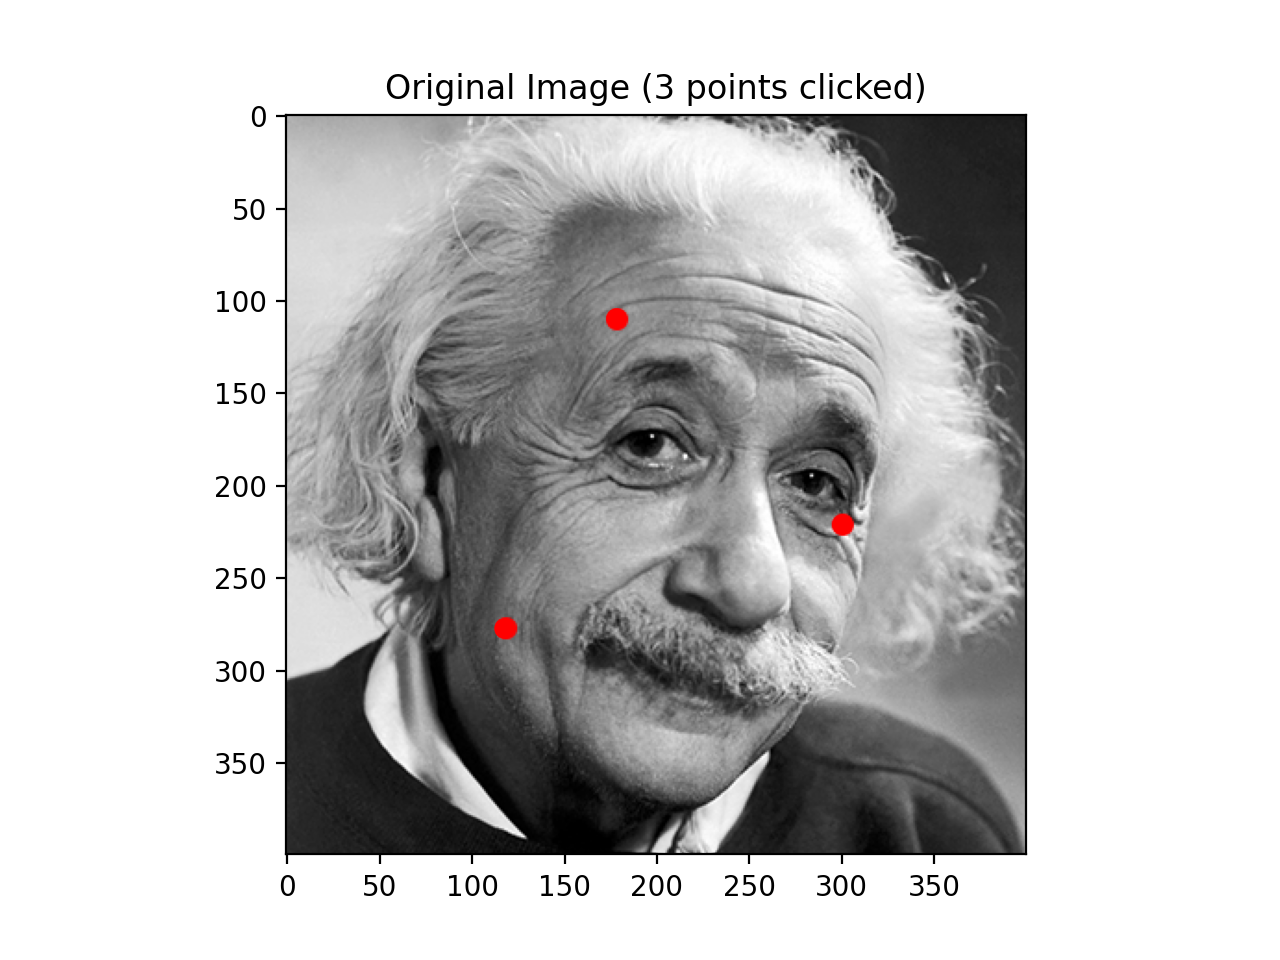

In [17]:
# load image
im = plt.imread( 'images/einstein.png' )

# matrix for storing coordinates
pointsBefore = np.zeros((2,0))

# function handling button clicks
def onclick(event):
    global pointsBefore
    pointsBefore = np.hstack((pointsBefore, [[event.xdata], [event.ydata]]))
    plt.title(f"Original Image ({pointsBefore.shape[1]} points clicked)")
    plt.scatter([event.xdata], [event.ydata], c='r', s=40)

# display original image and prompt user to select 3 points
fig = plt.figure()
plt.imshow(im)
cid = fig.canvas.mpl_connect('button_press_event', onclick) # for handling button click
plt.title("Original Image (Click on the three points)")
plt.show()

In [19]:
print(pointsBefore)

[[178.03253517 300.32690747 117.42647457]
 [109.11343344 220.58529491 276.86235119]]


#### Problem 3.2

The code snippet below randomly generates an affine transformation and warps the image using this transformation.

In the new warped image, click the three targets in the same order you clicked the three targets in the original. These warped points will be stored as columns in a new `pointsAfter` matrix.

<IPython.core.display.Javascript object>


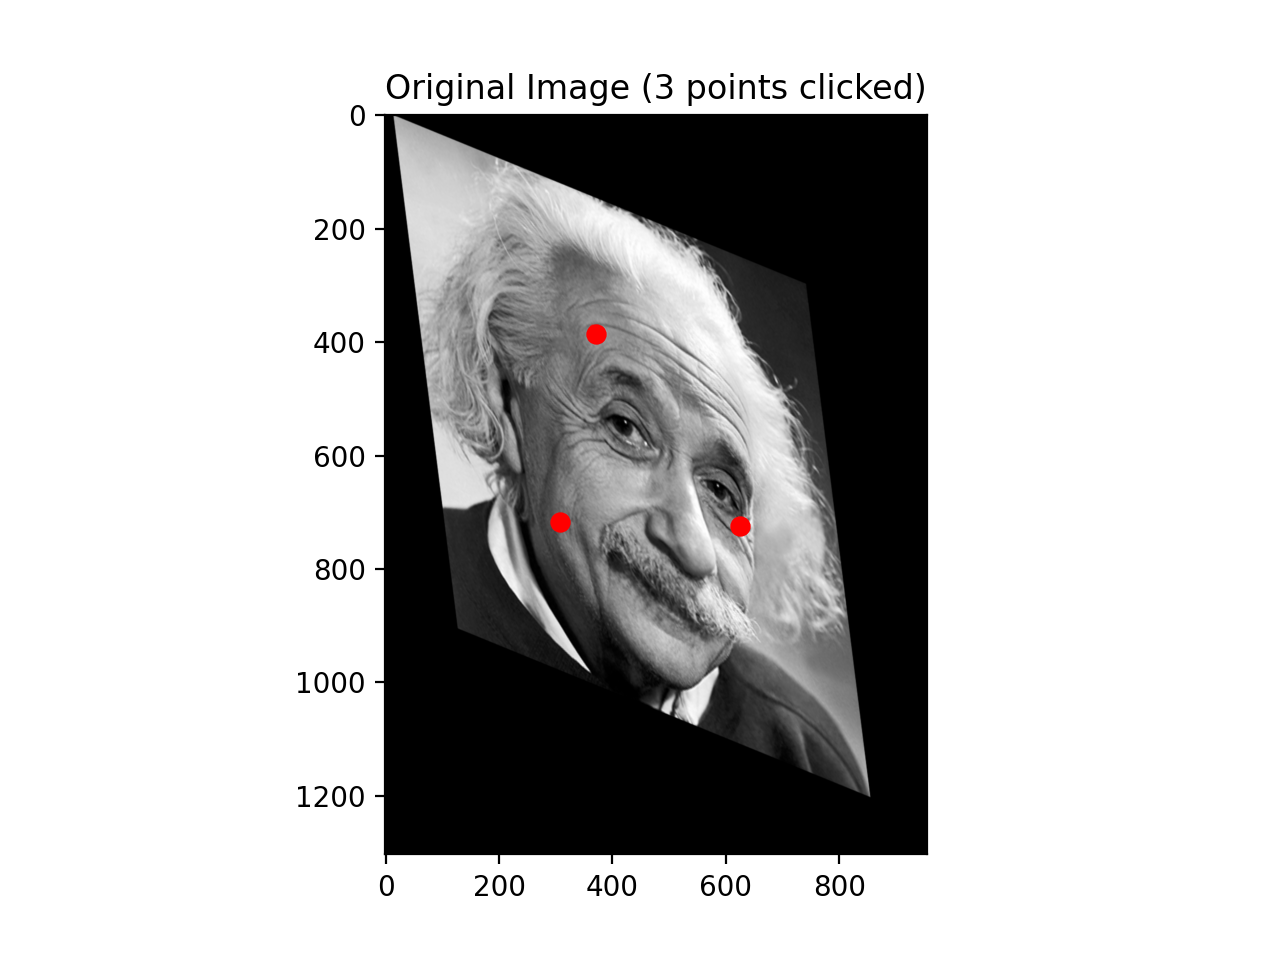

In [24]:
# generate a random 2 x 2 linear matrix
a = 1 + 0.25*(np.random.randn()+3)
b = 0.25*(np.random.randn()+1)
d = 0.25*(np.random.randn()+2)
e = 1 + 0.25*(np.random.randn()+3)
# generate a random 2 x 1 translation vector
c = 20*np.random.rand()
f = 20*np.random.rand()

# pack them into a 2x3 affine matrix
tform1 = np.array([[a, b, c], [d, e, f]])
height, width, _ = im.shape
imT1 = cv2.warpAffine(im,tform1,(int(width*a + height*b + c) + 100, int(width*d + height*e + f) + 100))

# matrix for storing coordinates
pointsAfter = np.zeros((2,0))

# function handling button clicks
def onclick(event):
    global pointsAfter
    pointsAfter = np.hstack((pointsAfter, [[event.xdata], [event.ydata]]))
    plt.title(f"Original Image ({pointsAfter.shape[1]} points clicked)")
    plt.scatter([event.xdata], [event.ydata], c='r', s=40)

# display warped image and prompt user to select 3 points (in same order
# as original)
fig = plt.figure()
plt.imshow(imT1)
cid = fig.canvas.mpl_connect('button_press_event', onclick) # for handling button click
plt.title("Warped image (Click on the 3 points)")
plt.show()

In [25]:
print(pointsBefore)
print(pointsAfter)

[[178.03253517 300.32690747 117.42647457]
 [109.11343344 220.58529491 276.86235119]]
[[371.73467938 625.76065341 308.22818588]
 [385.4507914  724.1520901  717.09581304]]


#### Problem 3.3
We want to solve for the $6$ unknown entries $a,b,c,d,e,f$ of a $2\times 3$ affine transformation matrix $T$ that maps each point (column) in `pointsAfter` back to the corresponding point (column) in `pointsBefore`.

Recall that an affine transformation can be expressed as a $2 \times 3$ matrix with the linear transformation in the leftmost $2 \times 2$ block and a $2 \times 1$ translation vector as the last column. To apply an affine transformation to a 2D point $(x,y)$ we first append a homogeneous coordinate of $1$ to the point and then multiply by the $2 \times 3$ affine matrix.

$$
\begin{align}
\begin{pmatrix}
x'\\
y'
\end{pmatrix}
&=
\underbrace{\begin{pmatrix}
a & b & c\\
d & e & f
\end{pmatrix}}_{T}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}
\end{align}.
$$




First express on paper a fully constrained linear system $A\bt = \bb$ where the unknown vector $\bt=(a,b,c,d,e,f)$ contains the 6 entries of the affine matrix $T$. Each pair of points provides two constraints, and you have three pairs, resulting in $6$ constraints total. You have $6$ unknowns, so $A$ is a $6\times 6$ matrix. Do not confuse $A$ with the $3\times 2$ affine matrix $T$. 

Then implement and solve the linear system in the function `compute_transform` below. Since the pattern of the constraints is the same for all pairs of points, you may find it useful to write a subroutine `add_affine_point_constraints` that fills in two rows of the matrix for a given corresponding pair of points.

**Warning:** Since we now have slightly larger matrices, you are not allowed to use the matrix inverse `np.linalg.inv`. Instead, use the function `np.linalg.solve`.

If all goes well, when we later apply this transformation to the modified image, it will restore it to its original appearance.

In [26]:
def add_affine_point_constraints(A, i, pointsBefore, pointsAfter):
    x1, y1 = pointsAfter[:, i]
    x1_, y1_ = pointsBefore[:, i]
    A[2*i, :] = [x1, y1, 1, 0, 0, 0]
    A[2*i + 1, :] = [0, 0, 0, x1, y1, 1]
    return A

#
# Compute transformation matrix to convert columns in pointsAfter
# to corresponding colums in pointsBefore
#
# This function should return a 2x3 matrix of the form:
#
# [[a, b, c],
#  [d, e, f]]
#
# where the 2x2 linear matrix is: [[a, b], [d, e]]
# and the 2x1 translation vector is: [[c], [f]]
def compute_transform(pointsBefore, pointsAfter):
    num_points = pointsAfter.shape[1]
    
    # Initialize the matrix A as a 2*num_points x 6 matrix
    A = np.zeros((2 * num_points, 6))
    
    # Populate matrix A with constraints for each point pair
    for i in range(num_points):
        A = add_affine_point_constraints(A, i, pointsBefore, pointsAfter)
    
    print(f'A =\n{A}')

    # Create the right-hand side vector b
    pointsBefore = np.transpose(pointsBefore)
    b = pointsBefore.flatten()
    print(f'b =\n{b}')

    # Solve the linear system using np.linalg.solve
    t = np.linalg.solve(A, b)
    
    # Extract the elements of the affine transformation matrix
    a, b, c, d, e, f = t.flatten()
    
    # Create and return the 2x3 affine transformation matrix
    T = np.array([[a, b, c],
                  [d, e, f]])
    print(f'T =\n{T}')    
    return T

Run the following code blocks to check if your function successfully restored the warped image back to its original appearance.

A =
[[371.73467938 385.4507914    1.           0.           0.
    0.        ]
 [  0.           0.           0.         371.73467938 385.4507914
    1.        ]
 [625.76065341 724.1520901    1.           0.           0.
    0.        ]
 [  0.           0.           0.         625.76065341 724.1520901
    1.        ]
 [308.22818588 717.09581304   1.           0.           0.
    0.        ]
 [  0.           0.           0.         308.22818588 717.09581304
    1.        ]]
b =
[178.03253517 109.11343344 300.32690747 220.58529491 117.42647457
 276.86235119]
T =
[[ 0.57760852 -0.07213788 -8.87897857]
 [-0.18767403  0.46987106 -2.23379513]]


<IPython.core.display.Javascript object>


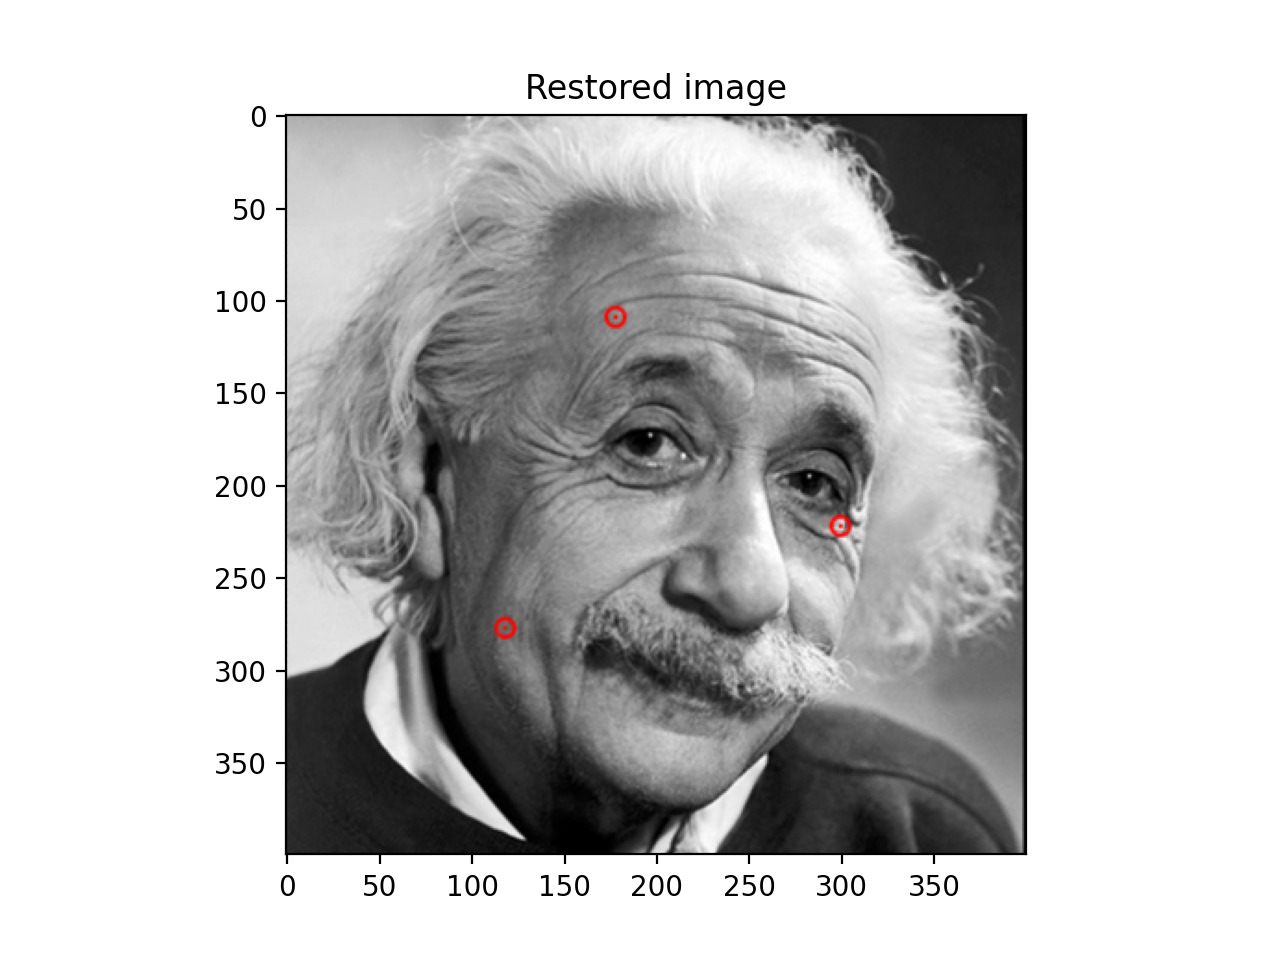

In [27]:
tback = compute_transform( pointsBefore, pointsAfter ) # the matrix to transform warped image back to original

# apply transformation to (hopefully) restore the original
imT2 = cv2.warpAffine( imT1, tback, (height,width)) # affine

fig = plt.figure()
plt.imshow(imT2)
plt.title('Restored image')
plt.show()

Run this code block to do an additional check: if you clicked the points and solved the system correctly, then multiplying the forward and backward transforms together should give something close to the identity matrix. The output should show an approximate identity matrix and an image which applies this matrix to the original.

Approximate Identity Matrix:
[[9.96130e-01 6.50000e-04]
 [8.15000e-03 1.00932e+00]]


<IPython.core.display.Javascript object>


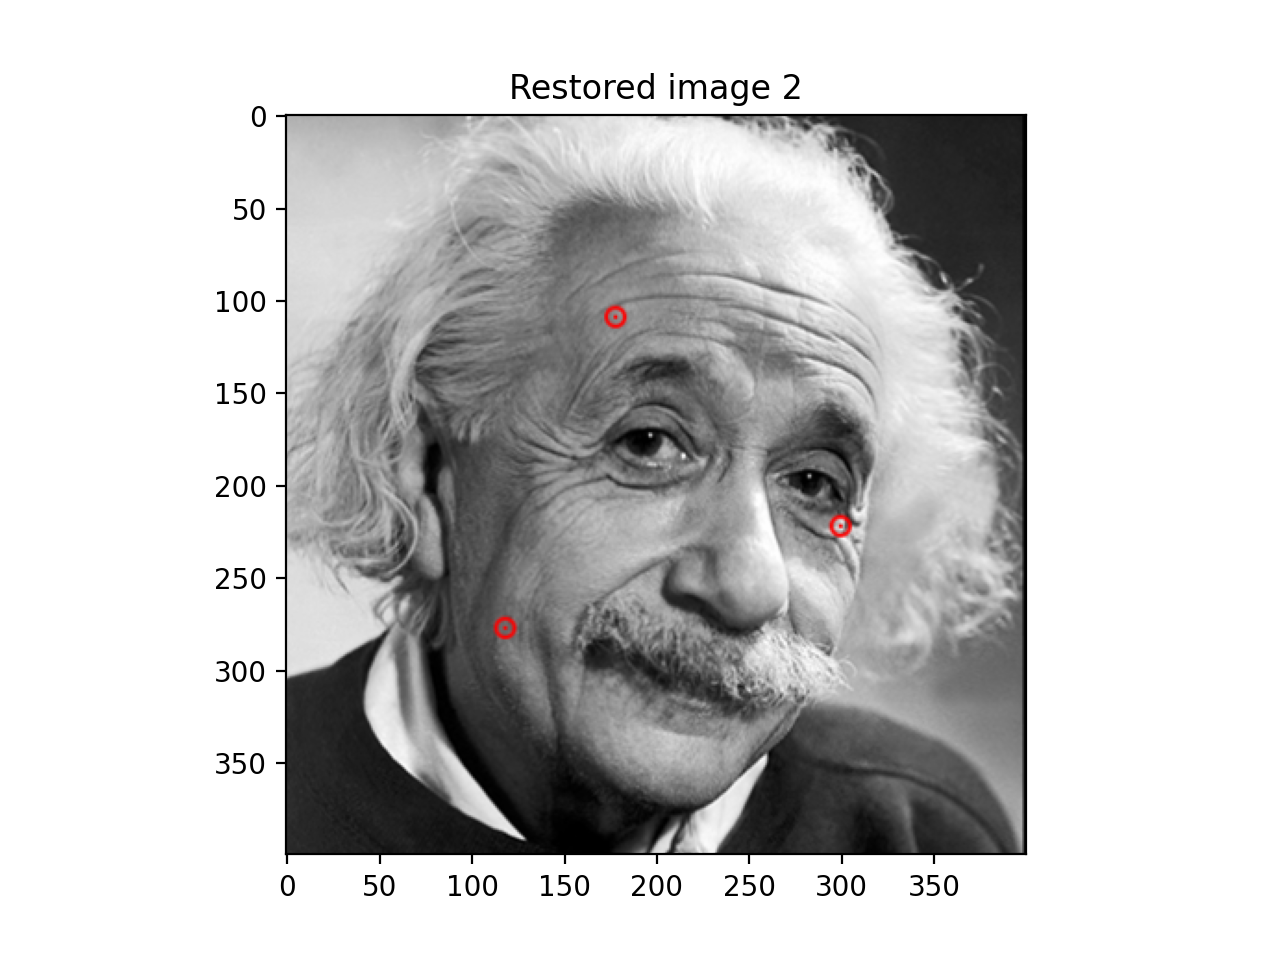

In [28]:
# multiply the forward and backward transforms to get something close to the identity matrix
iT1 = np.vstack([tback, [0,0,1]])
T1 = np.vstack([tform1, [0,0,1]])
ident = iT1 @ T1 
print(f"Approximate Identity Matrix:\n{ident[:2,:2].round(5)}")

imT3 = cv2.warpAffine( im, ident[:2,:], (height,width)) # affine
fig = plt.figure()
plt.imshow(imT3)
plt.title('Restored image 2')
plt.show()

## Task 2

In this task, you will implement a process to remove distortion in an image of a flat planar surface. This technique is motivated by a forensic technique for enhancing the identity of a car’s license plate. The idea is to assume the last row of a homogeneous matrix is not (0, 0, 1) any more as in the affine transformation. Instead, we set the two zeros to be non-zeros and consider their contribution in the transformation (we call this perspective transformation).

First, let's load up a photo of a license plate. Unfortunately, the license plate is hard to read since it is not facing the camera. On the figure below, click on the corners of the license plate in clockwise order, starting with the top-left corner. We'll use these four points to undistort the image.

In [ ]:
# load image
im = plt.imread( 'images/license.jpg' )

# matrix for storing coordinates
clicked = np.zeros((2,0))

# function handling button clicks
def onclick(event):
    global clicked
    clicked = np.hstack((clicked, [[event.xdata], [event.ydata]]))
    plt.title(f"Original Image ({clicked.shape[1]} points clicked)")
    plt.scatter([event.xdata], [event.ydata], c='r', s=40)

# display original image and prompt user to select 4 points
fig = plt.figure()
plt.imshow(im)
cid = fig.canvas.mpl_connect('button_press_event', onclick) # for handling button click
plt.title("Original Image (Click 4 points)")
plt.show()

We can model the apparant 2D distortion that points undergo due to such perspective projection using a $3 \times 3$ *homography* matrix $H$:
$$
\begin{align*}
\underbrace{\begin{pmatrix}
a & b & c\\
d & e & f\\
g & h & 1
\end{pmatrix}}_{H}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix} &=
\begin{pmatrix}
w'x'\\
w'y'\\
w'
\end{pmatrix}
\end{align*}.
$$
A homography matrix is always defined up to scale. This means that $H$ and $kH$ represent the same geometric transformation for any non-zero scalar $k$. In this assignment, we will use a quick and dirty way to resolve the scale ambiguity and will assume that the bottom right coefficient of the homography is 1.

We want to deduce the entries of the homography $H$ that maps the four corners we clicked above to the four corners of an undistorted rectangular license plate. Our unknowns are the elements of the homography matrix: $a, b, c, d, e, f, g, h$, while, for a given pair of corresponding points, $x, y$ and $x', y'$ are known. $w'$ is not known per say but can be deduced easily from other unknowns and known quantities. Each pair of points gives you two constraints, and you have four such pairs, giving you 8 constraints on 8 unknowns.

First express on paper a fully constrained linear system $A\bh = \bb$ where the unknown vector $\bh=(a,b,c,d,e,f,g,h)$ contains the 8 entries of the homography. You have $8$ unknowns, so $A$ is an $8\times 8$ matrix. Do not confuse $A$ with the $3\times 3$ homography matrix $H$. 

Write a function `compute_homography` that takes four pairs of points and returns a $3 \times 3$ homography matrix $H$ that maps the first point of each pair to the second one. 

Since the pattern of the constraints is the same for all pairs of points, you may find it useful to write a subroutine `add_homography_point_constraints` that fills in two rows of the matrix $A$ for a given correspondence pair.

In [ ]:
# Fill in 2 rows (2*i and 2*i+1) in matrix A to map point p to point q
def add_homography_point_constraints(A, i, p, q):
    x, y = p
    xp, yp = q
    A[2*i, :] = [x, y, 1, 0, 0, 0, -x*xp, -y*xp]
    A[2*i + 1, :] = [0, 0, 0, x, y, 1, -x*yp, -y*yp]   
    return A

# estimate homography that maps ps to qs
def compute_homography(ps, qs):
    print(f'ps =\n{ps}')    
    print(f'qs =\n{qs}')    
    num_points = 4

    # Initialize the matrix A as an 8x8 matrix
    A = np.zeros((2 * num_points, 8))

    # Populate matrix A with constraints for each point pair
    for i in range(num_points):
        A = add_homography_point_constraints(A, i, np.transpose(ps)[i], np.transpose(qs)[i])

    print(f'A =\n{A}')    
       
    # Right-hand side vector is just the flattened qs
    b = np.transpose(qs).flatten().reshape(-1, 1)

    print(f'b =\n{b}')    

    # Solve the linear system
    h = np.linalg.solve(A, b)
    print(f'h =\n{h}')    

    # Add the scaling factor (1) to get the full homography matrix
    H = np.append(h, 1)

    # Reshape H to a 3x3 matrix
    H = H.reshape((3, 3))

    return H

First, let's test that your homography properly undistorts the clicked points:

In [ ]:
# undistored coordinates of license plates (in pixels)
unwarped = np.array([[ 0, 400, 400,   0 ],
                     [ 0,   0, 200, 200 ]])


H = compute_homography( clicked, unwarped )
print(H)

# multiply H by each of the clicked points, but add a homogeneous coordinate 1 to each of them first
q = H @ np.vstack((clicked, [1, 1, 1, 1]))

# now divide by homogeneous coordinate to project back to 2D
print(np.round(q[:-1, :] / q[-1, :]))

# and compare to original unwarped coordinates
print(unwarped)

Now, let's test this function by warping the license plate image by the homography and plotting it:

In [ ]:
# apply transformation to (hopefully) restore the original
im2 = cv2.warpPerspective( im, H, (400,200))

fig = plt.figure()
plt.imshow(im2)
plt.title('Restored image')
plt.show()

## Submitting your work

Before handing in via Canvas, make sure:
  * your notebook runs from top to bottom after selecting "Kernel->Restart & Run All" without causing any errors. To simplify the grading process, please do **not** clear the generated output.
  * you've included any scans/images that your notebook references.
  * you've renamed the provided notebook according to your name and netid as: **[YourFirstName]\_[YourLastName]\_[YourNetId]\_[Assignment].ipynb**. For example, if John Doe has netid **F00237S**, his submission filename for SA1 should be **John_Doe_F00237S_SA1.ipynb**.